In [11]:
from keras.preprocessing.image import ImageDataGenerator
import keras
from keras.applications.vgg16 import VGG16
from keras.layers import Flatten, Dense, Dropout
import matplotlib.pyplot as plt

In [12]:
train_datagen = ImageDataGenerator(
    rescale = 1./255,
)

test_datagen = ImageDataGenerator(
    rescale = 1./255,
)

In [13]:
training_set = train_datagen.flow_from_directory(
      '../input/pneumonia-classification/train',
      target_size = (224,244),
      # color_mode = "grayscale",
      batch_size = 32,
      class_mode = "binary"
    )

testing_set = test_datagen.flow_from_directory(
      '../input/pneumonia-classification/test',
      target_size = (224,244),
      # color_mode = "grayscale",
      batch_size = 32,
      class_mode = "binary"
    )

Found 148 images belonging to 2 classes.
Found 40 images belonging to 2 classes.


In [14]:
model = VGG16(
      input_shape = (244,244,3),
      include_top = False,
      weights = 'imagenet'
    )

In [15]:
for layers in model.layers:
  layers.trainable = False

In [16]:
x = Flatten()(model.output)
x = Dense(4096, activation = "relu")(x)
x = Dropout(0.2)(x)
x = Dense(4096, activation = "relu")(x)
x = Dropout(0.2)(x)
x = Dense(4096, activation = "relu")(x)
x = Dropout(0.2)(x)
x = Dense(1, activation = "sigmoid")(x)

model = keras.Model(model.input, x)
model.compile(loss = "binary_crossentropy", optimizer = "adam", metrics = "accuracy")
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 244, 244, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 244, 244, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 244, 244, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 122, 122, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 122, 122, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 122, 122, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 61, 61, 128)       0   

In [25]:
hist = model.fit_generator(training_set,validation_data = testing_set, epochs = 10)

Epoch 1/10
5/5 [==============================] - 6s 1s/step - loss: 0.2037 - accuracy: 0.9459 - val_loss: 0.0486 - val_accuracy: 0.9500
Epoch 2/10
5/5 [==============================] - 5s 1s/step - loss: 0.2141 - accuracy: 0.9595 - val_loss: 0.3745 - val_accuracy: 0.9000
Epoch 3/10
5/5 [==============================] - 5s 1s/step - loss: 0.2470 - accuracy: 0.9189 - val_loss: 0.1656 - val_accuracy: 0.9250
Epoch 4/10
5/5 [==============================] - 6s 1s/step - loss: 0.0908 - accuracy: 0.9662 - val_loss: 0.4240 - val_accuracy: 0.8000
Epoch 5/10
5/5 [==============================] - 5s 1s/step - loss: 0.1309 - accuracy: 0.9595 - val_loss: 0.0142 - val_accuracy: 1.0000
Epoch 6/10
5/5 [==============================] - 5s 1s/step - loss: 0.0490 - accuracy: 0.9797 - val_loss: 0.0024 - val_accuracy: 1.0000
Epoch 7/10
5/5 [==============================] - 5s 986ms/step - loss: 0.0166 - accuracy: 0.9932 - val_loss: 0.0096 - val_accuracy: 1.0000
Epoch 8/10
5/5 [======================

In [26]:
hist = hist.history

Text(0, 0.5, 'accuracy')

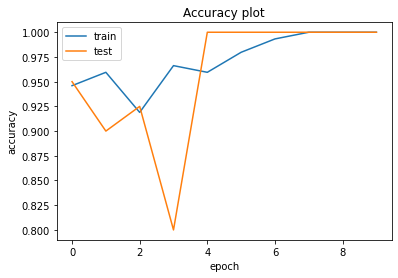

In [27]:
plt.plot(hist["accuracy"])
plt.plot(hist["val_accuracy"])
plt.title("Accuracy plot")
plt.legend(["train","test"])
plt.xlabel("epoch")
plt.ylabel("accuracy")

Text(0, 0.5, 'loss')

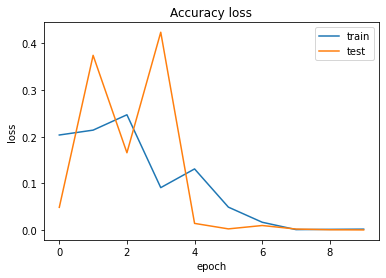

In [28]:
plt.plot(hist["loss"])
plt.plot(hist["val_loss"])
plt.title("Accuracy loss")
plt.legend(["train","test"])
plt.xlabel("epoch")
plt.ylabel("loss")